<a href="https://colab.research.google.com/github/GildasTaliah/FinancialTrading/blob/main/ML_BasedStrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Stock Return Prediction Leveraging Technical Indicators**

## **Intro**

$\quad$

Machine Learning (ML) is the science and art of programming computers so they can learn from data.
$\quad$

Traditional **econometrics models** such as linear regression and time series models are useful for forecasting returns and generating alpha signals based factor models (e.g CAPM, APT). However, they fall short when dealing with non-linear relationship between variables. Machine Learning techniques, while less interpretable, have shown to be more effective in these scenarios, especially with larger data sets.
$\quad$

CAPM: Capital Asset Pricing Model.
APT: Arbitrage Pricing Theory.
$\quad$

Machine learning techniques can be classified into three main classes namely supervised learning, unsupervised learning and Reinforcement learning. Furthermore,  Supervised learning can be classified into regression and classification techniques. There are numerous machine learning (ML) techniques that can be used for a variety of tasks, including regression, classification, and clustering.

Some examples of ML techniques available at our disposal include Ridge Regression, Logistic Regression, Support Vector Regression/Classification, Decision Trees Regression/Classification, Gradient Boosting, K-means Clustering etc.Our focus here is on the implementation of two types namely **Decision Trees and Random Forests**.


A typical machine learning process usually starts with **Data Collection** where the required data is gotten from source be it external or internal. It proceeds to **Data Cleaning** where the data is checked for accuracy, visualized and exploratory data analysis is carried out. Next, comes **Model Implementation** and **Model Validation**.



$\quad$
$\quad$
$\quad$
$\quad$

# **Machine Learning Classification Model**

Supervised ML techniques aims to predicts an output given sets of input features. In classification problems the output we are working with is either binary or from a fixed set of classifiers. We consider the decision trees and the random forest classifiers in this section.

**Decision trees** work by breaking a data set down based on it's features, creating a tree like structure to model this data. The algorithm first splits the training set into two subsets using a single feature $K$ and a threshold $t_{k}$. It searches the pair paramters ($K$, $t_{k}$) that produces the purest subsets.

**Random forest** combines the predictions made by multiple decision trees and returns a single outcome. Through a technique known as bagging or boostrap aggregation, the model leverages the capabilities of multiple decision trees. For classification the outcome is the majority class prediction.

## Downloading Data

We utilize a credible external source: Yahoo, to download data to be used for our experimentation.

In [62]:
import yfinance as yf

In [63]:
tickers = ['AAPL', 'TSLA', 'NFLX', 'MSFT', 'NVDA', 'AMZN', 'GM', 'BX']

In [64]:
#help(yf.download)

In [65]:
# Select Nvidia for case study
DF = yf.download(tickers[4], auto_adjust= True, interval= '1wk')
DF.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-18,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.036301,0.042869,0.036301,0.040600,1569600000
1999-02-01,0.037854,0.038212,0.033077,0.036301,812688000
1999-02-08,0.039884,0.040122,0.034152,0.038092,631248000
1999-02-15,0.039884,0.042272,0.036063,0.040600,424800000


In [66]:
# drop first level, columns
DF = DF.droplevel(1, axis = 1)
DF.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
1999-01-18,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.036301,0.042869,0.036301,0.040600,1569600000
1999-02-01,0.037854,0.038212,0.033077,0.036301,812688000
1999-02-08,0.039884,0.040122,0.034152,0.038092,631248000
1999-02-15,0.039884,0.042272,0.036063,0.040600,424800000


In [67]:
df_cla = yf.download(tickers[4], auto_adjust= True, interval= '1wk', multi_level_index= False)
df_cla

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
1999-01-18,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.036301,0.042869,0.036301,0.040600,1569600000
1999-02-01,0.037854,0.038212,0.033077,0.036301,812688000
1999-02-08,0.039884,0.040122,0.034152,0.038092,631248000
1999-02-15,0.039884,0.042272,0.036063,0.040600,424800000
...,...,...,...,...,...
2024-11-25,138.240479,142.040220,131.790926,141.980226,903463700
2024-12-02,142.430191,146.529899,137.810514,138.820439,928447900
2024-12-09,134.250000,141.820007,132.539993,138.970001,974961000


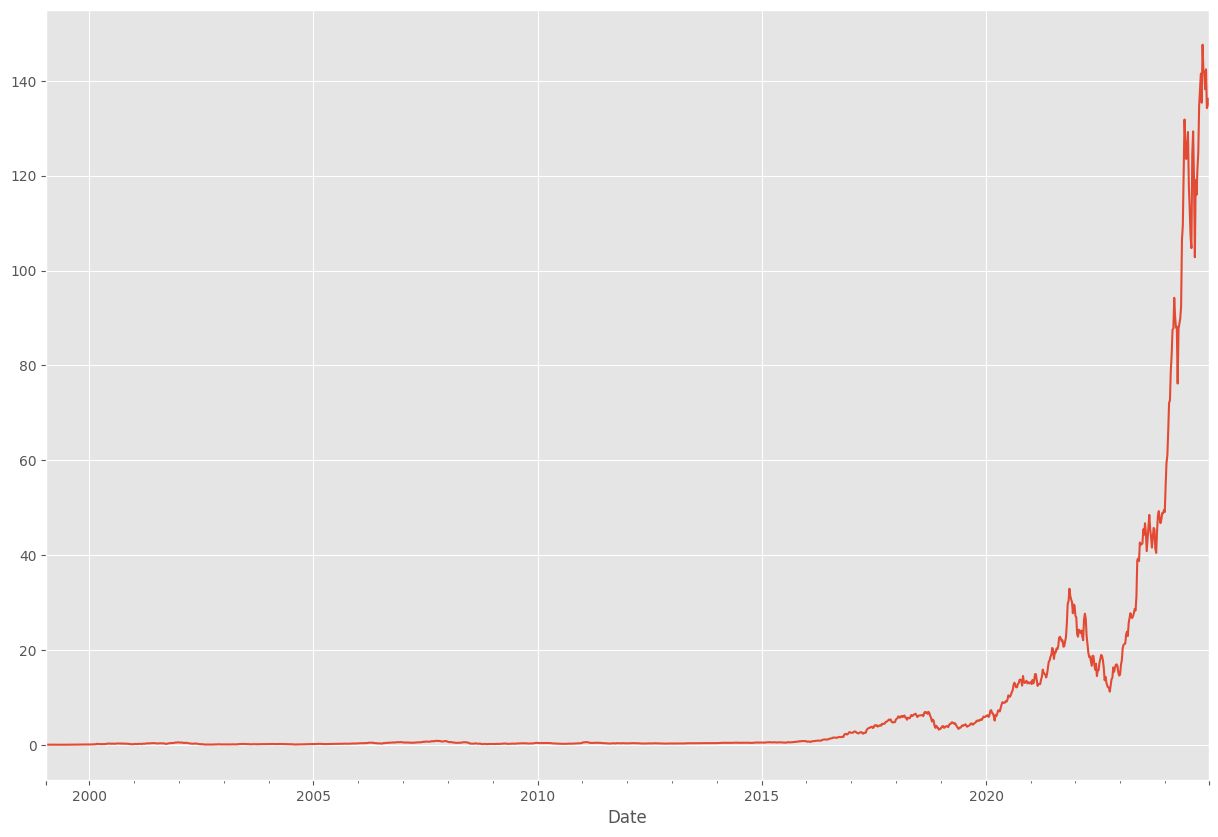

In [68]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df_cla.Close.plot(figsize= (15,10))
plt.show()

In [69]:
df_cla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1354 entries, 1999-01-18 to 2024-12-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1354 non-null   float64
 1   High    1354 non-null   float64
 2   Low     1354 non-null   float64
 3   Open    1354 non-null   float64
 4   Volume  1354 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.5 KB


## Data Visualization

Let us look at the price evolution, from inception to present day: 23-12-2024.

In [70]:
import plotly.graph_objects as go

In [71]:
# Plot
df = df_cla.iloc[-1000:]
fig = go.Figure(data = [go.Candlestick(x = df.index,
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])])
fig.show()

## Data Processiong and Feature Extraction

At this stage we extract additional features that would be used together with the price data: OHLC, to predict next day returns direction.

In [72]:
# computes returns and shift behind by a day
#df_aapl_new['change_tomorrow'] = df_aapl_new.Close.pct_change(-1)  * (-1)  * 100
#df_cla['Volume'] = np.log(df_cla.Volume)

# Percentage returns
df_cla['percent_ret'] = df_cla['Close'].pct_change()  * 100

# Momentum indicators
df_cla['SMA30'] = df_cla['percent_ret'].rolling(30).mean()
df_cla['SMA180'] = df_cla['percent_ret'].rolling(180).mean()

# Volatility Indicator
df_cla['Vol'] =  df_cla['percent_ret'].rolling(30).std()

# Mean Reverting Indicator: distance
df_cla['dist'] = df_cla['Close'] - df_cla['Close'].rolling(30).mean()

# Shift returns one day behind to serve as targets/dependent variable
df_cla['change_tomorrow'] = df_cla['percent_ret'].shift(-1)


df_cla.dropna(inplace = True)
df_cla.head(6)

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,change_tomorrow
Date,,,,,,,,,,,
2002-07-01,0.145129,0.145205,0.119374,0.130685,4345380000,10.535269,-3.236091,1.691354,10.263027,-0.208105,4.844803
2002-07-08,0.152160,0.161102,0.136263,0.143448,6078096000,4.844803,-3.390973,1.737680,10.098066,-0.189424,-8.940592
2002-07-15,0.138556,0.178449,0.137563,0.152542,7280028000,-8.940592,-3.635167,1.664248,10.142114,-0.191195,-18.863781
2002-07-22,0.112419,0.141843,0.109286,0.137945,6893844000,-18.863781,-4.425514,1.529650,10.379427,-0.203830,-36.437351
2002-07-29,0.071457,0.129768,0.069545,0.117082,11403840000,-36.437351,-5.734123,1.327220,11.810451,-0.229439,-1.604267
2002-08-05,0.070310,0.073214,0.064884,0.070386,4729224000,-1.604267,-5.473989,1.290038,11.812679,-0.216862,16.194688


- There are a bunch of other features that that can be extracted, for instance the spread between close and open.  

In [73]:
df_cla.describe().round(4)

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,change_tomorrow
count,1173.0000,1173.0000,1173.0000,1173.0000,1.173000e+03,1173.0000,1173.0000,1173.0000,1173.0000,1173.0000,1173.0000
mean,9.2951,9.6912,8.7996,9.1824,2.813638e+09,0.8468,0.7671,0.7735,6.7009,1.6161,0.8388
std,23.4979,24.5073,22.2346,23.2221,1.491939e+09,7.1140,1.4981,0.4835,2.5816,5.9303,7.1084
min,0.0622,0.0684,0.0550,0.0614,3.565360e+08,-38.8459,-5.7341,-0.1085,2.6416,-8.4836,-38.8459
25%,0.2932,0.3056,0.2795,0.2914,1.784280e+09,-3.1722,0.0694,0.3138,4.9298,-0.0126,-3.1722
50%,0.4943,0.5156,0.4758,0.4920,2.528196e+09,0.6652,0.8681,0.8634,6.1914,0.0401,0.6652
75%,5.7393,5.9727,5.3757,5.6985,3.464588e+09,4.7468,1.7809,1.1594,7.7415,0.4614,4.6838
max,147.6198,152.8795,140.0704,148.6698,1.480571e+10,34.4023,4.1260,1.8708,15.7238,54.3433,34.4023


Did stock go up or down

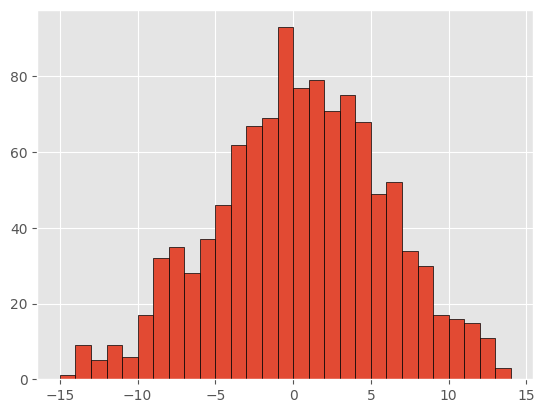

In [74]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df_cla['percent_ret'].hist(bins=range(-15,15), edgecolor='black');

In [75]:
print(f'Mean : {df_cla.percent_ret.mean():.4f}\n')
print(f'StandDev: {df_cla.percent_ret.std():.4f}\n')

Mean : 0.8468

StandDev: 7.1140



In [76]:
import numpy as np
df_cla['change_tomorrow'] = np.where( df_cla['change_tomorrow'] < 0, 0, 1)
df_cla
df_cla.head()

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,change_tomorrow
Date,,,,,,,,,,,
2002-07-01,0.145129,0.145205,0.119374,0.130685,4345380000,10.535269,-3.236091,1.691354,10.263027,-0.208105,1
2002-07-08,0.152160,0.161102,0.136263,0.143448,6078096000,4.844803,-3.390973,1.737680,10.098066,-0.189424,0
2002-07-15,0.138556,0.178449,0.137563,0.152542,7280028000,-8.940592,-3.635167,1.664248,10.142114,-0.191195,0
2002-07-22,0.112419,0.141843,0.109286,0.137945,6893844000,-18.863781,-4.425514,1.529650,10.379427,-0.203830,0
2002-07-29,0.071457,0.129768,0.069545,0.117082,11403840000,-36.437351,-5.734123,1.327220,11.810451,-0.229439,0


In [77]:
print(f' Value Counts : {df_cla.change_tomorrow.value_counts()}')

# Split data, use last 250 weeks data for testing
df_cla_is = df_cla.iloc[:-250]
df_cla_oos = df_cla.iloc[-250:]

 Value Counts : change_tomorrow
1    640
0    533
Name: count, dtype: int64


In [134]:
# Obtain target and features
target = df_cla_is.change_tomorrow
explanatory = df_cla_is.drop(columns= ['Close', 'High', 'Low', 'Open', 'Volume', 'percent_ret', 'change_tomorrow'])

target_oos = df_cla_oos.change_tomorrow
explanatory_oos = df_cla_oos.drop(columns= ['Close', 'High', 'Low', 'Open', 'Volume', 'percent_ret', 'change_tomorrow'])

The parametrs needed for for the model include but not limited to: criterion, max_depth, splitter, max_features etc. We work with the default parameters except for the maximum depth of trees where we set it to **10**.  

In [79]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit tree model, with max depth 10
model_dt = DecisionTreeClassifier(max_depth= 10, criterion= "gini", random_state= 75)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=10, random_state=75)

In [80]:
#max_depth= ,

In [81]:
# View parameters: DT
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 75,
 'splitter': 'best'}

The parametrs needed for for the model include but not limited to: criterion, max_depth, n_estimators etc. We will utlizie the default parameters except for the maximum depth of trees where we set it to **10**.  

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Inatsntiate an fit forest model, with max depth 10
model_rf = RandomForestClassifier(max_depth=10, n_estimators= 50, criterion= "gini", random_state=75)
model_rf.fit(explanatory, target)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=75)

In [83]:
# View parameters: RF
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 75,
 'verbose': 0,
 'warm_start': False}

In [84]:
col = explanatory.columns.tolist()
col

['SMA30', 'SMA180', 'Vol', 'dist']

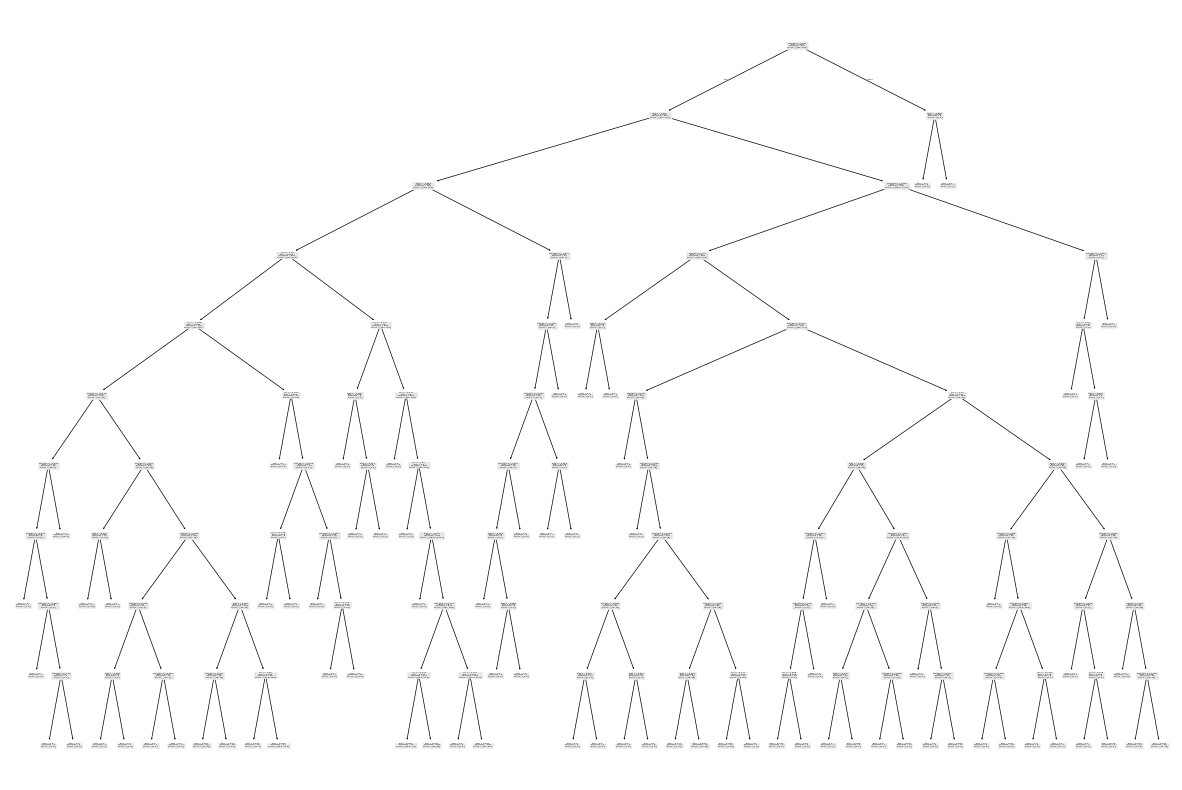

In [85]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(decision_tree= model_dt, feature_names= model_dt.feature_names_in_)
plt.show()

SMA30     0.313257
dist      0.248317
SMA180    0.235739
Vol       0.202687
dtype: float64 



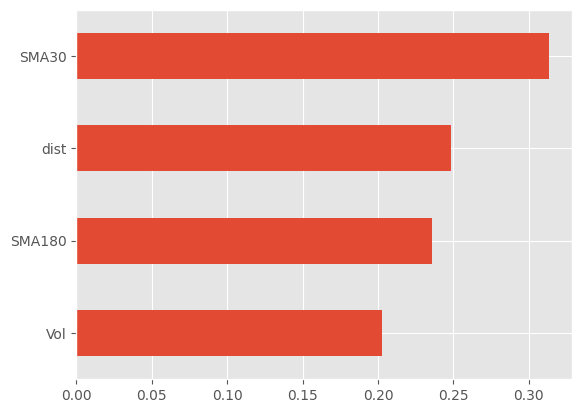

In [132]:
# feature impotance: Decision tree
import pandas as pd
importances = model_dt.feature_importances_
import_dt = pd.Series(importances, index= model_dt.feature_names_in_  )
print(import_dt.nlargest(5), '\n')
import_dt.nsmallest(len(import_dt)).plot(kind= 'barh')
plt.show()

SMA30     0.311668
Vol       0.235674
dist      0.227181
SMA180    0.225477
dtype: float64 



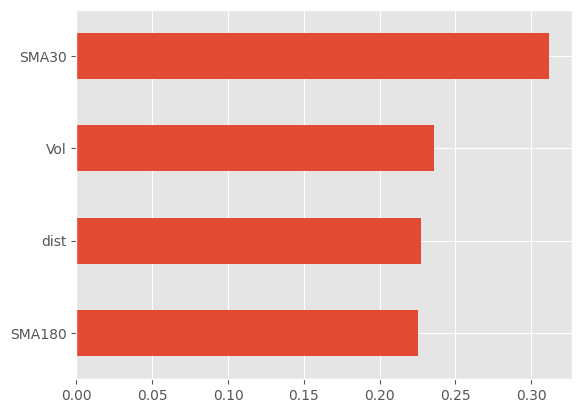

In [131]:
# feature importance: Random Forest
importances = model_rf.feature_importances_
import_rf = pd.Series(importances, index= model_rf.feature_names_in_)
print(import_rf.nlargest(5), '\n')
import_rf.nsmallest(len(import_rf)).plot(kind= 'barh')
plt.show()

**In-Sample**

In [88]:
# Concat predicted values and actual values in a frame

## DT
y_pred_dt = model_dt.predict(X = explanatory)
df_pred_dt = pd.DataFrame(target)
df_pred_dt['prediction'] = y_pred_dt
print(df_pred_dt.sum())
df_pred_dt.head(6)

change_tomorrow    498
prediction         526
dtype: int64


,change_tomorrow,prediction
Date,,
2002-07-01,1,0
2002-07-08,0,0
2002-07-15,0,0
2002-07-22,0,0
2002-07-29,0,0
2002-08-05,1,0


In [89]:
# RF
y_pred_rf = model_rf.predict(X = explanatory)
df_pred_rf = pd.DataFrame(target)
df_pred_rf['prediction'] = y_pred_rf
print(df_pred_rf.sum())
df_pred_rf.head(6)

change_tomorrow    498
prediction         512
dtype: int64


,change_tomorrow,prediction
Date,,
2002-07-01,1,1
2002-07-08,0,0
2002-07-15,0,0
2002-07-22,0,0
2002-07-29,0,0
2002-08-05,1,1


Evaluate the model:

Use accuracy metric to evaluate

In [90]:
# DT
compdt = df_pred_dt.change_tomorrow == df_pred_dt.prediction
print('DT sum', compdt.sum(), '\n')

# RF
comprf = df_pred_rf.change_tomorrow == df_pred_rf.prediction
print('RF sum', comprf.sum(), '\n')
# Length of df
print('Length of data: ', len(comprf))

DT sum 667 

RF sum 885 

Length of data:  923


In [91]:
# Accuracy

## DT
print('DT accuracy: ', compdt.sum() / len(compdt), '\n')
## RF
print('RF accuracy: ', comprf.sum() / len(comprf))

DT accuracy:  0.7226435536294691 

RF accuracy:  0.9588299024918743


**Out sample**

In [92]:
explanatory_oos.head()

,SMA30,SMA180,Vol,dist
Date,,,,
2020-03-09,1.506903,0.888251,4.959212,0.539479
2020-03-16,0.961077,0.820848,5.761507,-0.370906
2020-03-23,1.618155,0.954848,7.006004,0.728304
2020-03-30,1.276629,0.922411,6.996638,0.454207
2020-04-06,1.475447,0.940937,7.097267,0.861034


In [93]:
# Concat predicted values and actual values in a frame: Out-Sample

## DT
y_pred_dt = model_dt.predict(X = explanatory_oos)
df_pred_dt = pd.DataFrame(target_oos)
df_pred_dt['prediction'] = y_pred_dt
print(df_pred_dt.sum())
df_pred_dt.tail(6)

change_tomorrow    142
prediction         173
dtype: int64


,change_tomorrow,prediction
Date,,
2024-11-11,0,1
2024-11-18,0,1
2024-11-25,1,1
2024-12-02,0,1
2024-12-09,1,0
2024-12-16,1,1


In [94]:
# Concat predicted values and actual values in a frame

## RF
y_pred_rf = model_rf.predict(X = explanatory_oos)
df_pred_rf = pd.DataFrame(target_oos)
df_pred_rf['prediction'] = y_pred_rf
print(df_pred_rf.sum())
df_pred_rf.tail(6)

change_tomorrow    142
prediction         136
dtype: int64


,change_tomorrow,prediction
Date,,
2024-11-11,0,1
2024-11-18,0,1
2024-11-25,1,1
2024-12-02,0,1
2024-12-09,1,0
2024-12-16,1,1


In [95]:
# Evaluate models

# DT
compdt = df_pred_dt.change_tomorrow == df_pred_dt.prediction
print('DT sum', compdt.sum(), '\n')

# RF
comprf = df_pred_rf.change_tomorrow == df_pred_rf.prediction
print('RF sum', comprf.sum(), '\n')
# Length of df
print('Length of data: ', len(comprf))

DT sum 135 

RF sum 126 

Length of data:  250


In [96]:
# Accuracy

## DT
print('DT accuracy: ', compdt.sum() / len(compdt), '\n')
## RF
print('RF accuracy: ', comprf.sum() / len(comprf))

DT accuracy:  0.54 

RF accuracy:  0.504


In [97]:
#!pip install vectorbt

In [98]:
import vectorbt as vbt
vbt.__version__

'0.27.0'

In [99]:
# Bactest: DT

bactest_dt = vbt.Portfolio.from_signals(df_cla_oos['Close'], entries= df_pred_dt['prediction'] == 1, exits= df_pred_dt['prediction'] ==0, freq= '1W')
stats_dt = bactest_dt.stats()
stats_dt.to_frame(name='Values')

,Values
Start,2020-03-09 00:00:00
End,2024-12-16 00:00:00
Period,1750 days 00:00:00
Start Value,100.0
End Value,822.626813
Total Return [%],722.626813
Benchmark Return [%],2145.205861
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],56.846273


In [100]:
# Bactest: RF

bactest_rf = vbt.Portfolio.from_signals(df_cla_oos['Close'], entries= df_pred_rf['prediction'] == 1, exits= df_pred_rf['prediction'] ==0, freq= '1W')
stats_rf = bactest_rf.stats()
stats_rf.to_frame(name='Values')

,Values
Start,2020-03-09 00:00:00
End,2024-12-16 00:00:00
Period,1750 days 00:00:00
Start Value,100.0
End Value,597.538637
Total Return [%],497.538637
Benchmark Return [%],2145.205861
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],51.670373


## **Strategy logic**
If our model predicts 1, we buy! 0 we sell!

$\quad$


**Now we automate the process** so we can apply to different sets of stocks

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
def ML_ClassStratBacktest(ticker: str, test_set: int = 255, model: str= 'RF') -> pd.DataFrame:


  # Download history
  DF = yf.download(ticker, auto_adjust= True, interval= '1wk', multi_level_index= False)
  df = pd.DataFrame(DF.Close)


  ## Preprocesing and feature extraction
  # Percentage returns
  df['percent_ret'] = df.pct_change()  * 100

  # Momentum indicators
  df['SMA30'] = df['percent_ret'].rolling(30).mean()
  df['SMA180'] = df['percent_ret'].rolling(180).mean()

  # Volatility Indicator
  df['Vol'] = df['percent_ret'].rolling(30).std()

  # Mean Reverting Indicator: distance
  df['dist'] = df['Close'] - df['Close'].rolling(30).mean()

  df.dropna(inplace = True)

  # Shift returns one day behind to serve as targets/dependent variable
  df['change_tomorrow'] = df['percent_ret'].shift(-1)
  # classify return to 'UP' or 'DOWN', 1 and 0
  df['change_tomorrow'] = np.where( df['change_tomorrow'] > 0, 1, 0)
  print('Stock Symbol: ', ticker)
  print(f' Value Counts : {df.change_tomorrow.value_counts()}', '\n')

  # Split data: In-sample - is, and Out-of-Sample - os
  df_is = df.iloc[:-test_set]
  df_oos = df.iloc[-test_set:]

  # Obtain target and features: In sample
  target_is = df_is.change_tomorrow
  explanatory_is = df_is.drop(columns= ['Close', 'percent_ret', 'change_tomorrow'])

  # Out sample
  target_oos = df_oos.change_tomorrow
  explanatory_oos = df_oos.drop(columns= ['Close', 'percent_ret', 'change_tomorrow'])

  ## Inantiate and fit model, with max depth 10
  if model == 'DT':
    model = DecisionTreeClassifier(max_depth=10, criterion= "gini", random_state= 75)
    model.fit(explanatory_is, target_is)
  elif model == 'RF':
    model = RandomForestClassifier(max_depth=10, n_estimators= 80, criterion= "gini", random_state=75)
    model.fit(explanatory_is, target_is)
  else:
    print('Invalid model: ', model, '. Model must be either RF or DT')


  ## Print In-sample and Out-sample accuracy score
  # Predictions on train and test set
  pred_is = model.predict(explanatory_is)
  pred_oos = model.predict(explanatory_oos)


  # Predictions on train set
  print(f'Pred accuracy for: {ticker}')
  # Train score
  print(f'Train accuracy score: {accuracy_score(pred_is, target_is)}')
  # Test score
  print(f'Test accuracy score: {accuracy_score(pred_oos, target_oos)}')
  print()

  # Bactest Result
  # Total return
  print(f'Total return for: {ticker}')
  price = df_oos.Close
  print(price.iloc[-1]/ price.iloc[0] * 100, '\n')


  bactest_results = vbt.Portfolio.from_signals(price, \
                    entries = pred_oos == 1, exits= pred_oos == 0, freq= '1W')
  stats = bactest_results.stats()


  return  stats.to_frame(name= ticker)

In [103]:
# test function
ML_ClassStratBacktest('NVDA')

[*********************100%***********************]  1 of 1 completed


Stock Symbol:  NVDA
 Value Counts : change_tomorrow
1    636
0    538
Name: count, dtype: int64 

Pred accuracy for: NVDA
Train accuracy score: 0.9651795429815017
Test accuracy score: 0.47058823529411764

Total return for: NVDA
1939.5652941468452 



,NVDA
Start,2020-02-10 00:00:00
End,2024-12-23 00:00:00
Period,1785 days 00:00:00
Start Value,100.0
End Value,317.627288
Total Return [%],217.627288
Benchmark Return [%],1839.565294
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],59.034326


 $\quad$
 $\quad$
 $\quad$
 $\quad$

$\quad$
$\quad$
$\quad$

# **Machine Learning Regression Model**
$\quad$

Decision trees and Random forest introduced earlier are also capable of performing regression task, as you may have gues their output would be continuous variables.

In this part we essentially re-do the whole task as above, except we make use their regression algorithm.

In [104]:
df = df_cla.copy()
df.head()

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,change_tomorrow
Date,,,,,,,,,,,
2002-07-01,0.145129,0.145205,0.119374,0.130685,4345380000,10.535269,-3.236091,1.691354,10.263027,-0.208105,1
2002-07-08,0.152160,0.161102,0.136263,0.143448,6078096000,4.844803,-3.390973,1.737680,10.098066,-0.189424,0
2002-07-15,0.138556,0.178449,0.137563,0.152542,7280028000,-8.940592,-3.635167,1.664248,10.142114,-0.191195,0
2002-07-22,0.112419,0.141843,0.109286,0.137945,6893844000,-18.863781,-4.425514,1.529650,10.379427,-0.203830,0
2002-07-29,0.071457,0.129768,0.069545,0.117082,11403840000,-36.437351,-5.734123,1.327220,11.810451,-0.229439,0


In [105]:
# mean returns for in-sample
std = df_cla_is.percent_ret.iloc[:250].std()
mean_returns = np.abs(df_cla_is.iloc[:-250].percent_ret.mean())
print(mean_returns, std) # mean n  std

# compute 60% percentile
per_60 = np.percentile(df_cla_is.percent_ret.iloc[:250], 60)
print(per_60)


# drop change tommorow
df.drop(columns= ['change_tomorrow'], inplace= True)
df['percent_ret_lag1'] = df['percent_ret'].shift(-1)
df.dropna(inplace = True)
df.head()

0.493900863543797 8.768227496900888
2.5622284949187795


,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,percent_ret_lag1
Date,,,,,,,,,,,
2002-07-01,0.145129,0.145205,0.119374,0.130685,4345380000,10.535269,-3.236091,1.691354,10.263027,-0.208105,4.844803
2002-07-08,0.152160,0.161102,0.136263,0.143448,6078096000,4.844803,-3.390973,1.737680,10.098066,-0.189424,-8.940592
2002-07-15,0.138556,0.178449,0.137563,0.152542,7280028000,-8.940592,-3.635167,1.664248,10.142114,-0.191195,-18.863781
2002-07-22,0.112419,0.141843,0.109286,0.137945,6893844000,-18.863781,-4.425514,1.529650,10.379427,-0.203830,-36.437351
2002-07-29,0.071457,0.129768,0.069545,0.117082,11403840000,-36.437351,-5.734123,1.327220,11.810451,-0.229439,-1.604267


##  Data Processing

In [106]:
# In-sample and out-sample data
df_is = df.iloc[:-250]
df_oos = df.iloc[-250:]
df_oos

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,percent_ret_lag1
Date,,,,,,,,,,,
2020-03-02,6.627196,7.096760,6.426915,6.897725,3196684000,-1.433278,1.938959,0.971412,4.514373,1.235024,-9.472280
2020-03-09,5.999450,6.503639,5.375690,5.976034,3146148000,-9.472280,1.506903,0.888251,4.959212,0.539479,-14.569816
2020-03-16,5.125341,5.737392,4.500834,5.291245,4005020000,-14.569816,0.961077,0.820848,5.761507,-0.370906,22.833510
2020-03-23,6.295636,6.554456,4.945236,5.124343,3873888000,22.833510,1.618155,0.954848,7.006004,0.728304,-3.489883
2020-03-30,6.075926,6.860358,5.938420,6.361151,3548100000,-3.489883,1.276629,0.922411,6.996638,0.454207,7.806146
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,141.970215,149.639685,140.070352,148.669750,1017459800,-3.827137,2.380192,1.408492,7.781893,22.892081,-0.021130
2024-11-18,141.940216,152.879465,137.140544,139.490388,1396925400,-0.021130,1.874894,1.400569,7.408123,21.054549,-2.606546
2024-11-25,138.240479,142.040220,131.790926,141.980226,903463700,-2.606546,1.747964,1.360600,7.452550,15.705729,3.030742


In [107]:
# Obtain target and features
target = df_is.percent_ret_lag1
explanatory = df_is.drop(columns= ['Close', 'High', 'Low', 'Open', 'Volume', 'percent_ret', 'percent_ret_lag1'])

target_oos = df_oos.percent_ret_lag1
explanatory_oos = df_oos.drop(columns= ['Close', 'High', 'Low', 'Open', 'Volume', 'percent_ret', 'percent_ret_lag1'])

In [108]:
explanatory_oos.head()

,SMA30,SMA180,Vol,dist
Date,,,,
2020-03-02,1.938959,0.971412,4.514373,1.235024
2020-03-09,1.506903,0.888251,4.959212,0.539479
2020-03-16,0.961077,0.820848,5.761507,-0.370906
2020-03-23,1.618155,0.954848,7.006004,0.728304
2020-03-30,1.276629,0.922411,6.996638,0.454207


In [136]:
from sklearn.tree import DecisionTreeRegressor

# Inantiate and fit decision tree, with max depth 15
model_dt = DecisionTreeRegressor(max_depth=15, criterion= "squared_error", random_state= 75)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=20, random_state=75)

In [137]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 75,
 'splitter': 'best'}

In [142]:
from sklearn.ensemble import RandomForestRegressor

# Inantiate and fit random forest, with max depth 15
model_rf = RandomForestRegressor(max_depth=15, criterion = 'squared_error', , n_estimators= 50, random_state=75)
model_rf.fit(explanatory, target)

RandomForestRegressor(max_depth=10, random_state=75)

In [143]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 75,
 'verbose': 0,
 'warm_start': False}

In [111]:
y_preds = model_dt.predict(X=explanatory_oos)
df_preds_dt = df_oos[['percent_ret_lag1']].copy()

df_preds_dt['prediction'] = y_preds
df_preds_dt

,percent_ret_lag1,prediction
Date,,
2020-03-02,-9.472280,1.411917
2020-03-09,-14.569816,1.411917
2020-03-16,22.833510,3.489406
2020-03-23,-3.489883,1.411917
2020-03-30,7.806146,1.411917
...,...,...
2024-11-11,-0.021130,-8.161309
2024-11-18,-2.606546,-8.161309
2024-11-25,3.030742,-8.161309


In [112]:
y_pred = model_rf.predict(X=explanatory_oos)
df_preds_rf = df_oos[['percent_ret_lag1']].copy()

df_preds_rf['prediction'] = y_pred
df_preds_rf

,percent_ret_lag1,prediction
Date,,
2020-03-02,-9.472280,2.181218
2020-03-09,-14.569816,1.693859
2020-03-16,22.833510,1.526558
2020-03-23,-3.489883,1.272907
2020-03-30,7.806146,1.353232
...,...,...
2024-11-11,-0.021130,-0.088186
2024-11-18,-2.606546,-0.886656
2024-11-25,3.030742,-0.045599


SMA30     0.313257
dist      0.248317
SMA180    0.235739
Vol       0.202687
dtype: float64 



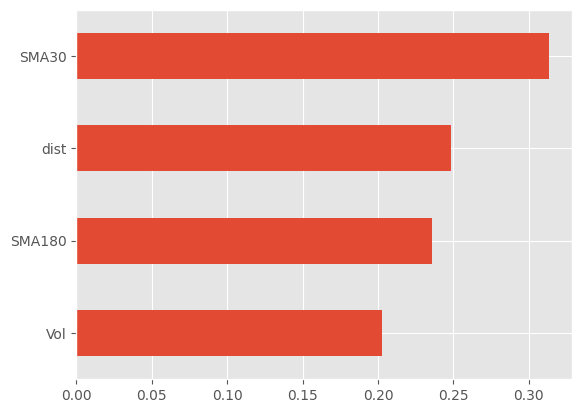

In [126]:
# feature impotance: Decision tree
importances = model_dt.feature_importances_
import_dt = pd.Series(importances, index= model_dt.feature_names_in_  )
print(import_dt.nlargest(5), '\n')
import_dt.nsmallest(5).plot(kind = 'barh')
plt.show()

SMA30     0.311668
Vol       0.235674
dist      0.227181
SMA180    0.225477
dtype: float64 



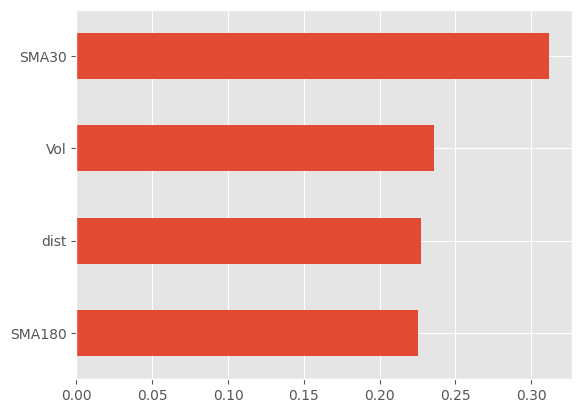

In [127]:
# feature importance: Random Forest
importances, names = model_rf.feature_importances_ , model_rf.feature_names_in_
import_rf = pd.Series(importances, index= names)
print(import_rf.nlargest(5), '\n')
import_rf.nsmallest(5).plot(kind = 'barh')
plt.show()

Evaluate model predictions

In [115]:
# Evaluate models

# DT
mse_dt = (df_preds_dt.percent_ret_lag1 - df_preds_dt.prediction) ** 2
print(f' DT Mean Squared Error: {mse_dt.mean():.4f}\n')

# RF
mse_prf = (df_preds_rf.percent_ret_lag1 - df_preds_rf.prediction) ** 2
print(f' RF Mean Squared Error: {mse_prf.mean():.4f}\n')

# Length of df
print('Length of data: ', len(comprf))

 DT Mean Squared Error: 117.5585

 RF Mean Squared Error: 49.0114

Length of data:  250


In [116]:
# we want to map figures to seem like a classification problem

# DT
print(per_60)
df_preds_dt['predictions'] = np.where( df_preds_dt['prediction'] > per_60, 1, 0)

df_preds_rf['predictions'] = np.where( df_preds_rf['prediction'] > per_60, 1, 0)

2.5622284949187795


In [117]:
df_preds_dt

,percent_ret_lag1,prediction,predictions
Date,,,
2020-03-02,-9.472280,1.411917,0
2020-03-09,-14.569816,1.411917,0
2020-03-16,22.833510,3.489406,1
2020-03-23,-3.489883,1.411917,0
2020-03-30,7.806146,1.411917,0
...,...,...,...
2024-11-11,-0.021130,-8.161309,0
2024-11-18,-2.606546,-8.161309,0
2024-11-25,3.030742,-8.161309,0


In [118]:
df_preds_rf

,percent_ret_lag1,prediction,predictions
Date,,,
2020-03-02,-9.472280,2.181218,0
2020-03-09,-14.569816,1.693859,0
2020-03-16,22.833510,1.526558,0
2020-03-23,-3.489883,1.272907,0
2020-03-30,7.806146,1.353232,0
...,...,...,...
2024-11-11,-0.021130,-0.088186,0
2024-11-18,-2.606546,-0.886656,0
2024-11-25,3.030742,-0.045599,0


In [119]:
# Bactest: DT
bactest_dt = vbt.Portfolio.from_signals(df_oos['Close'], entries= df_preds_dt['predictions'] == 1, exits= df_preds_dt['predictions'] ==0, freq= '1W')
stats_dt = bactest_dt.stats()
stats_dt.to_frame(name='Values')



,Values
Start,2020-03-02 00:00:00
End,2024-12-09 00:00:00
Period,1750 days 00:00:00
Start Value,100.0
End Value,159.953799
Total Return [%],59.953799
Benchmark Return [%],1925.743522
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],43.968318


In [120]:
bactest_rf = vbt.Portfolio.from_signals(df_oos['Close'], entries= df_preds_rf['predictions'] == 1, exits= df_preds_rf['predictions'] ==0, freq= '1W')
stats_rf = bactest_rf.stats()
stats_rf.to_frame(name='Values')

,Values
Start,2020-03-02 00:00:00
End,2024-12-09 00:00:00
Period,1750 days 00:00:00
Start Value,100.0
End Value,127.568526
Total Return [%],27.568526
Benchmark Return [%],1925.743522
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],20.647884


## **Strategy logic**
If our regression model predicts the next day's return would be greater than 1%  and we haven't bought the underlying stock yet, we initiate a buy order, else if it predicts next day's return less than -4% we initiate a sell order.

Typically, a set of target parameter needs to be tested on in-sample data to see which pair would likely yield optimal results out-sample, this procedure is known as **strategy optmization**. The target 1% and -4% were choosen arbitrarily.



In [ ]:
# Import metric to asses regression models perfomance
from sklearn.metrics import mean_squared_error as mse

In [ ]:
def ML_RegStratBacktest(ticker: str, test_set: int = 500, model: str= 'RF') -> pd.DataFrame:


  # Download history
  DF = yf.download(ticker, auto_adjust= True, interval= '1wk', multi_level_index= False)
  df = pd.DataFrame(DF.Close)


  ## Preprocesing and feature extraction
  # Percentage returns
  df['percent_ret'] = df.pct_change()  * 100

  # Momentum indicators
  df['SMA30'] = df['percent_ret'].rolling(30).mean()
  df['SMA180'] = df['percent_ret'].rolling(180).mean()

  # Volatility Indicator
  df['Vol'] = df['percent_ret'].rolling(30).std()

  # Mean Reverting Indicator: distance
  df['dist'] = df['Close'] - df['Close'].rolling(30).mean()

  df.dropna(inplace = True)

  # Shift returns one day behind to serve as targets/dependent variable
  df['change_tomorrow'] = df['percent_ret'].shift(-1)
  # classify return to 'UP' or 'DOWN', 1 and 0
  df['change_tomorrow'] = np.where( df['change_tomorrow'] > 0, 1, 0)
  print('Stock Symbol: ', ticker)

  print(f' Value Counts : {df.change_tomorrow.value_counts()}', '\n')

  # Split data: In-sample - is, and Out-of-Sample - os
  df_is = df.iloc[:-test_set]
  df_oos = df.iloc[-test_set:]

  # Obtain target and features: In sample
  target_is = df_is.change_tomorrow
  explanatory_is = df_is.drop(columns= ['Close', 'percent_ret', 'change_tomorrow'])

  # Out sample
  target_oos = df_oos.change_tomorrow
  explanatory_oos = df_oos.drop(columns= ['Close', 'percent_ret', 'change_tomorrow'])


  # Instantiate and fit model, with max depth
  if model == 'DT':
  # Inantiate and fit decision tree, with max depth 15
    model_dt = DecisionTreeRegressor(max_depth=15, criterion= "squared_error", random_state= 75)
    model_dt.fit(explanatory, target)
  elif model == 'RF':
    # Inantiate and fit random forest, with max depth 15
    model_rf = RandomForestRegressor(max_depth=10, criterion = 'squared_error',  n_estimators= 50, random_state=75)
    model_rf.fit(explanatory, target)
  else:
    pass

  ## Print In-sample and Out-sample accuracy score
  # Predictions on train and test set
  pred_is = model.predict(explanatory_is)
  pred_oos = model.predict(explanatory_oos)


  # Predictions on train set
  print(f'Pred accuracy for: {ticker}')
  # Train score
  print(f'Train accuracy score: {accuracy_score(pred_is, target_is)}')
  # Test score
  print(f'Test accuracy score: {accuracy_score(pred_oos, target_oos)}')
  print()

  # Evaluate models

  # DT
  mse_dt = (df_preds_dt.percent_ret_lag1 - df_preds_dt.prediction) ** 2
  print(f' DT Mean Squared Error: {mse_dt.mean():.4f}\n')

  # RF
  mse_prf = (df_preds_rf.percent_ret_lag1 - df_preds_rf.prediction) ** 2
  print(f' RF Mean Squared Error: {mse_prf.mean():.4f}\n')

  # Bactest Result
  # Total return
  print(f'Total return for: {ticker}')
  price = df_oos.Close
  print(price.iloc[-1]/ price.iloc[0] * 100, '\n')


  bactest_results = vbt.Portfolio.from_signals(price, \
                    entries = pred_oos == 1, exits= pred_oos == 0, freq= '1W')
  stats = bactest_results.stats()


  return stats.to_frame(name= ticker)

In [ ]:
ML_RegStratBacktest('NVDA')

# Results

In [ ]:
# Run bactest for each and print accuracy score
result_CLAS = [ML_ClassStratBacktest(ticker, model= 'DT') for ticker in tickers]

In [ ]:
# Run bactest for each and print mean squared error
result_REG = [ML_RegStratBacktest(ticker) for ticker in tickers]

In [ ]:
# @title Out-sample Results from ML Classification Model
pd.concat(result_CLAS, axis = 1)

In [ ]:
# @title Out-sample Results from ML Regression Model
pd.concat(result_REG, axis = 1)

$\quad$

We can observe that on average most stocks perform well under ML regression strategy when compared to ML classification. Tesla suffers a loss under both techniques, an even greater loss under classification.

Moreover, stocks like **Nvidia** perfoms well under both strategies, although it enjoys a higher sharpe ratio and suffers a lower drawdown under ML regression.

In predicting the next day return, ML classification models tells us whether to to buy or not, but continuous prediction/Regression gives us percantage of increase or dcrease and lays the decision making on our door steps, making the decision making process better; most likely while it has outperfom the ML classification model in this regards. Thus ML Regression suits this situation.

Lastly, both predictive analytics models have huge potentials in predicting next days stock returns and can be improved for better performance,  particularly ML regression. It has to be said the model was trained only once and used for the entire duration, for instance, to improve prediction, we can utilize **an anchored walk-forward bactesting** approach to update model parameters continuously with the frequently changing regime and/or non-linear features.  

**The End!**

# References
- [LinkedIn Course: Practical Python for Algorithmic Trading](https://github.com/LinkedInLearning/practical-python-for-algorithmic-trading-4403633)

- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O'Reilly Media.